# FACULTAD DE INGENIERÍA Y CIENCIAS EXACTAS
Departamento de Tecnología Informática

PROGRAMACION I

# Trabajo Práctico 08: TUPLAS, CONJUNTOS, DICCIONARIOS

In [1]:

tuple_str = lambda cont, sep: sep.join(map(str, cont))
'Imprime un tuple separado por sep'

min_total = lambda hora: (hora[0] * 60) + hora[1]
'Devuelve el valor absoluto en minutos de una tupla (hh, mm)'

min_a_hora = lambda mins: ((mins // 60), (mins % 60))
'Convierte minutos a tupla (hh, mm)'

def ingreso_natural(texto='Ingrese un numero natural: '):
    'Ingresa un numero entero valido o None'
    while True:
        try:
            num = int(input(texto))
            if num == -1:
                raise KeyboardInterrupt
            if num < -1:
                raise ValueError('* Caracter invalido, debe ingresar un ' + \
                'numero entero positivo 0 -1 para salir.')
            break
        except ValueError as error:
            print(error)
    return num

def ingresa_separados(texto, cant, separador):
    '''
    Devuelve los valores numericos de un ingreso separado por separador
    ej: ingreso= 20/4/2020 separador= "/" --> 20, 4, 2020
        ingreso= 04:20 separador= ":" --> 4, 20
    '''
    try:
        fecha = tuple(map(int, input(texto).split(separador)))
        if len(fecha) != cant:
            raise ValueError
    except ValueError:
        raise ValueError(f'Debe ingresar {cant} valores numericos separados por "{separador}"')
    return fecha

def es_bisiesto(anio):
    'Determina si un año es bisiesto'
    es_bi = False
    if not anio % 4:
        if not anio % 100:
            if not anio % 400:
                es_bi = True
        else:
            es_bi = True
    return es_bi

def dias_en_mes(mes, anio):
    'Devuelve cuantos dias tiene el mes valido "mes"'
    if mes == 2:
        if es_bisiesto(anio):
            dias = 29
        else:
            dias = 28
    elif mes in (4, 6, 9, 11):
        dias = 30
    else:
        dias = 31
    return dias

def fecha_valida(fecha):
    'Determina si una fecha es valida, de no serlo : raise ValueError'
    dia, mes, anio = fecha
    if mes in range(1, 13):
        dias = dias_en_mes(mes, anio)
        if dia not in range(1, dias + 1):
            raise ValueError(f'Dia {dia} invalido en un mes de {dias} dias.\n')
    else:
        raise ValueError(f'Mes invalido "{mes}".')

def ingresa_fecha():
    'Devuelve una tupla en formato (Dia, Mes, Año) validados'
    while True:
        try:
            fecha = ingresa_separados('Ingresa la fecha en formato d/m/a: ', 3, r'/')
            fecha_valida(fecha)
            break
        except ValueError as error:
            print(f'\n\nFecha invalida: {error}')
    return fecha

def hora_valida(horario):
    'Determina si una hora es valida, de no serlo : raise ValueError'
    hora, minuto = horario
    if hora not in range(24) or minuto not in range(60):
        raise ValueError(f'Hora invalida {hora}:{minuto}')

def ingresa_hora():
    'Devuelve una tupla en formato (hora, minuto) validada'
    while True:
        try:
            hora = ingresa_separados('Ingresa la hora en formato hh:mm : ', 2, r':')
            hora_valida(hora)
            break
        except ValueError as error:
            print(f'\n\nHora invalida: {error}')
    return hora

def suma_dias(fecha, dias):
    'Devuelve tupla (dia, mes, año) con la fecha fecha + dias'
    dia, mes, anio = fecha
    dias_m = dias_en_mes(mes, anio)
    for _ in range(dias):
        if dia < dias_m:
            dia += 1
        else:
            if mes < 12:
                mes += 1
                dia = 1
            else:
                dia, mes = 1, 1
                anio += 1
            dias_m = dias_en_mes(mes, anio)
    return (dia, mes, anio)

def diferencia_horas(hora1, hora2):
    'Calcula la diferencia entre dos horas'

    abs_1, abs_2 = min_total(hora1), min_total(hora2)
    # abs_n = tiempo absoluto en minutos
    if abs_1 < abs_2:
        dif = abs_2 - abs_1
    else:
        dif = (24 * 60) - abs_1 + abs_2
    return min_a_hora(dif)

def __main__():
    try:
        fecha = ingresa_fecha()
        print(f"Ingreso la fecha {tuple_str(fecha, sep='/')}")

        a_sumar = ingreso_natural('\nIngrese la cantidad de dias a sumar: ')
        if a_sumar:
            nueva_fecha = suma_dias(fecha, a_sumar)
            print(f"Nueva fecha fecha {tuple_str(nueva_fecha, sep='/')}")
        
        print('A continuacion ingrese dos horas para calcular su diferencia.')
        hora1 = ingresa_hora()
        hora2 = ingresa_hora()
        horas, minutos = diferencia_horas(hora1, hora2)
        print(f'La diferencia de horario es de {horas}hs y {minutos}min')


    except KeyboardInterrupt:
        print('Ha abandonado el programa.')

if __name__ == "__main__":
    __main__()


Ingresa la fecha en formato d/m/a: 23062020


Fecha invalida: Debe ingresar 3 valores numericos separados por "/"
Ingresa la fecha en formato d/m/a: 30/04/1970
Ingreso la fecha 30/4/1970

Ingrese la cantidad de dias a sumar: 34
Nueva fecha fecha 3/6/1970
A continuacion ingrese dos horas para calcular su diferencia.
Ingresa la hora en formato hh:mm : 12:23
Ingresa la hora en formato hh:mm : 23:12
La diferencia de horario es de 10hs y 49min


In [5]:
def fecha_valida(fecha):
    'Determina si una fecha es valida, de no serlo : raise ValueError'
    dia, mes, anio = fecha
    if mes in range(1, 13):
        dias = dias_en_mes(mes, anio)
        if dia not in range(1, dias + 1):
            raise ValueError(f'Dia {dia} invalido en un mes de {dias} dias.\n')
    else:
        raise ValueError(f'Mes invalido "{mes}".')

def ingresa_fecha():
    'Devuelve una tupla en formato (Dia, Mes, Año) validados'
    while True:
        try:
            fecha = ingresa_separados('Ingresa la fecha en formato d/m/a: ', 3, r'/')
            fecha_valida(fecha)
            break
        except ValueError as error:
            print(f'\n\nFecha invalida: {error}')
    return fecha


def fecha_a_str(fecha):
    '''
    Devuelve una fecha valida representada en str
    Si no es valida, raise ValueError
    '''
    meses = ['enero', 'febrero', 'marzo', 'abril',
        'mayo', 'junio', 'julio', 'agosto',
        'septiembre', 'octubre', 'noviembre', 'diciembre']
    fecha_valida(fecha)
    dia, mes, anio = fecha
    return f'{dia} de {meses[mes-1].capitalize()} de {anio}'

def __main__():

    fecha = ingresa_fecha()
    fecha_str = fecha_a_str(fecha)
    print(fecha_str)

if __name__ == "__main__":
    __main__()

Ingresa la fecha en formato d/m/a: 23/12/2011
23 de Diciembre de 2011


In [6]:

def partes_mail(mail):
    '''
    Devuelve tupla con las partes mail si es valida, de no ser raise: ValueError
    '''
    valido = False
    if mail.count('@') == 1:
        nombre, direccion = mail.split('@')
        partes = (nombre,)
        if '.' in direccion:
            valido = True
            partes += tuple(direccion.split('.'))
    if not valido:
        raise ValueError(f'Direccion de mail invalida "{mail}"')
    return partes

def __main__():
    
    while True:
        try:
            mail = input('Ingrese una direccion de correo: ')
            if not mail:
                raise KeyboardInterrupt
            partes = partes_mail(mail)
            print(f'Partes del mail: {partes}')
            print('\nIngrese otra direccion o un campo vacio para salir')

        except ValueError as error:
            print(error)
        except KeyboardInterrupt:
            break
    print('Ha abandonado el programa.')
    
if __name__ == "__main__":
    __main__()

Ingrese una direccion de correo: fa@gmail.com
Partes del mail: ('fa', 'gmail', 'com')

Ingrese otra direccion o un campo vacio para salir
Ingrese una direccion de correo:  
Direccion de mail invalida " "
Ingrese una direccion de correo: 
Ha abandonado el programa.


In [7]:
def ingreso_natural(texto='Ingrese un numero natural: ', max=6):
    'Ingresa un numero entero valido o None'
    while True:
        try:
            num = int(input(texto))
            if num == -1:
                raise KeyboardInterrupt
            if num not in range(-1, max + 1):
                raise ValueError(f'* Caracter invalido, debe ingresar un ' + \
                'numero entero positivo menor a {max} o -1 para salir.')
            break
        except ValueError as error:
            print(error)
    return num

def encajan(ficha1, ficha2):
    'Determina si las fichas de domino encajan entre ellas'
    a, b = ficha1
    return a in ficha2 or b in ficha2

def ingreso_domino():
    'Ingresa una ficha de domino valida'
    dom = ()
    for i in range(2):
        dom += ingreso_natural(texto='Ingrese un valor de domino: ', max=6),
    return dom


def __main__():

    try:
        print('Ingrese la ficha 1')
        ficha1 = ingreso_domino()
        print('Ingrese la ficha 2')
        ficha2 = ingreso_domino()
        print(f'Fichas ingresadas: {ficha1} - {ficha2}')
        if encajan(ficha1, ficha2):
            print('Las piezas encajan.')
        else:
            print('Las piezas no encajan.')
    except KeyboardInterrupt:
        print('Abandono el programa')


if __name__ == "__main__":
    __main__()

Ingrese la ficha 1
Ingrese un valor de domino: 3
Ingrese un valor de domino: 2
Ingrese la ficha 2
Ingrese un valor de domino: 1
Ingrese un valor de domino: 4
Fichas ingresadas: (3, 2) - (1, 4)
Las piezas no encajan.


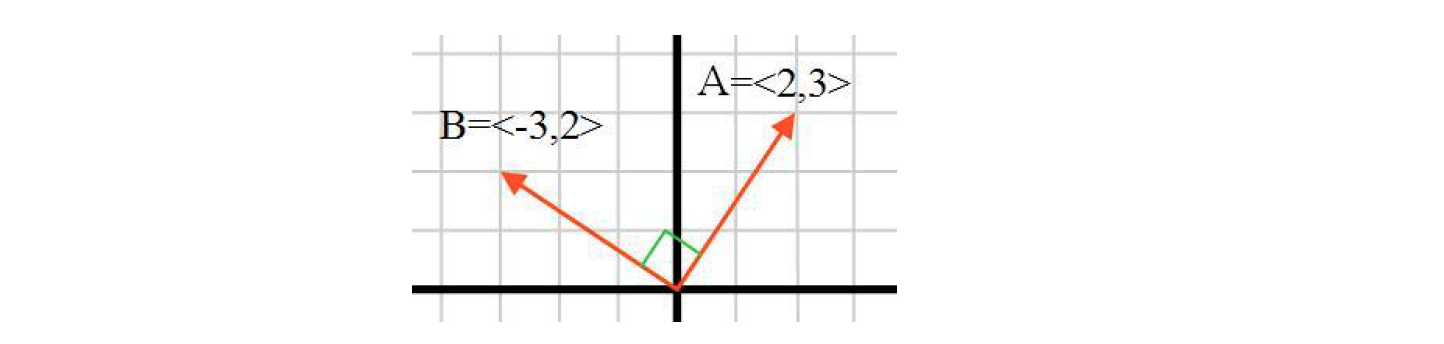

In [8]:
def son_ortogononales(vec1, vec2):
    'Determina si dos vectores en R^n son ortogonales'
    if len(vec1) != len(vec2):
        raise ValueError('Los vectores estan en distintos espacios.')
    prod = 0
    for i in range(len(vec1)):
        prod += vec1[i] * vec2[i]
    return not prod

def ingresa_vector():
    'Ingresa un vector en R^n y lo devuelve como tupla'
    while True:
        try:
            params = input('Ingrese el vector (x,y): ')
            if not params:
                vec = ()
                break
            vec = tuple(map(float, params.strip('()').split(',')))
            break
        except ValueError:
            print('\n*Solo se permiten numeros.')
    return vec

def __main__():
    
    vec1 = ingresa_vector()
    vec2 = ingresa_vector()
    if vec1 and vec2:
        try:
            if son_ortogononales(vec1, vec2):
                print(f'Los vectores {vec1} y {vec2} son ortogonales.')
            else:
                print(f'Los vectores {vec1} y {vec2} no son ortogonales.')
        except ValueError as error:
            print(f'Error: {error}')
    else:
        print('No se recibieron los datos suficientes.')


if __name__ == "__main__":
    __main__()

Ingrese el vector (x,y): 2,5
Ingrese el vector (x,y): 5,4
Los vectores (2.0, 5.0) y (5.0, 4.0) no son ortogonales.


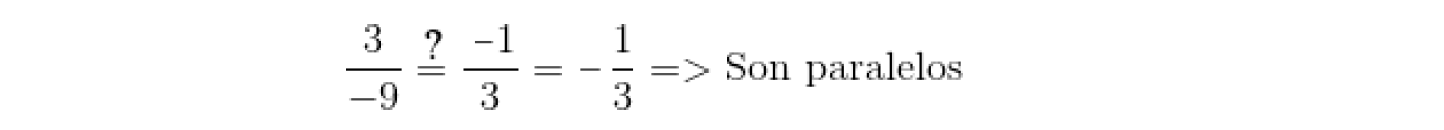

In [9]:
def son_paralelos(vec1, vec2, i=0):
    'Determina si dos vectores en R^n son ortogonales'
    if len(vec1) != len(vec2):
        raise ValueError('Los vectores estan en distintos espacios.')
    try:
        div = vec1[i] / vec2[i]
    except ZeroDivisionError:
        div = 0
    if (i + 1) == len(vec1):
        return div
    else:
        return div == son_paralelos(vec1, vec2, i+1)

def ingresa_vector():
    'Ingresa un vector en R^n y lo devuelve como tupla'
    while True:
        try:
            params = input('Ingrese el vector (x,y): ')
            if not params:
                vec = ()
                break
            vec = tuple(map(float, params.strip('()').split(',')))
            break
        except ValueError:
            print('\n*Solo se permiten numeros.')
    return vec

def __main__():
    
    vec1 = ingresa_vector()
    vec2 = ingresa_vector()
    if vec1 and vec2:
        try:
            if son_paralelos(vec1, vec2):
                print(f'Los vectores {vec1} y {vec2} son paralelos.')
            else:
                print(f'Los vectores {vec1} y {vec2} no son paralelos.')
        except ValueError as error:
            print(f'Error: {error}')
    else:
        print('No se recibieron los datos suficientes.')


if __name__ == "__main__":
    __main__()

Ingrese el vector (x,y): 2,3
Ingrese el vector (x,y): 3,4
Los vectores (2.0, 3.0) y (3.0, 4.0) no son paralelos.


In [10]:

palabra_limpia = lambda palabra: ''.join(filter(lambda letra: letra.isalnum(), palabra))
'Devuelve la palabra recibida con solo caracteres alfanumericos'

def palabras_sin_reps(frase):
    'Devuelve lista con palabras unicas ordenadas alfabeticamente'
    palabras = list(set(map(palabra_limpia, frase.lower().split())))
    palabras.sort(key=len)
    return palabras

def __main__():
    
    frase = input('Ingrese una frase: ')
    if frase:
        unicas = palabras_sin_reps(frase)
        print('Las palabras unicas son:')
        for palabra in unicas:
            print(f' - {palabra}')
    else:
        print('No se ingreso ninguna palabra')

if __name__ == "__main__":
    __main__()

Ingrese una frase: hola como estas
Las palabras unicas son:
 - hola
 - como
 - estas


In [11]:

def ingreso_natural(texto='Ingrese un numero natural: '):
    'Ingresa un numero natural o -1'
    while True:
        try:
            num = int(input(texto))
            if num < -1:
                raise ValueError('* Caracter invalido, debe ingresar un ' + \
                'numero entero positivo o -1 para salir.')
            break
        except ValueError as error:
            print(error)
    return num

def quitar(conj, elem):
    'elimina el elemento elem del conj si existe'
    try:
        conj.remove(elem)
    except KeyError:
        print(f'\n ** El elemento {elem} no es parte del conjunto.')

def __main__():
    
    conj = set(range(10))
    while True:

        print(f'\nConjunto: {conj}')
        elim = ingreso_natural('Ingrese el item a eliminar del conjunto: ')
        if elim == -1:
            break
        quitar(conj, elim)

    
if __name__ == "__main__":
    __main__()


Conjunto: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Ingrese el item a eliminar del conjunto: 5

Conjunto: {0, 1, 2, 3, 4, 6, 7, 8, 9}
Ingrese el item a eliminar del conjunto: 2

Conjunto: {0, 1, 3, 4, 6, 7, 8, 9}
Ingrese el item a eliminar del conjunto: 
invalid literal for int() with base 10: ''
Ingrese el item a eliminar del conjunto: w
invalid literal for int() with base 10: 'w'
Ingrese el item a eliminar del conjunto: 1

Conjunto: {0, 3, 4, 6, 7, 8, 9}
Ingrese el item a eliminar del conjunto:  
invalid literal for int() with base 10: ' '
Ingrese el item a eliminar del conjunto: -1


In [12]:

def numero_cuadrado(hasta):
    'Devuelve un diccionario con numeros naturales hasta hasta con su cuadrado'
    nums = {}
    for i in range(hasta):
        nums[i+1] = (i+1) ** 2
    return nums

def imprime_dic(dic):
    'Imprime clave y valor de diccionario en orden ascendente'
    for clave in sorted(dic.keys()):
        print(f'{clave} = {dic[clave]}')

def __main__():
    
    nums = numero_cuadrado(20)
    imprime_dic(nums)

if __name__ == "__main__":
    __main__()

1 = 1
2 = 4
3 = 9
4 = 16
5 = 25
6 = 36
7 = 49
8 = 64
9 = 81
10 = 100
11 = 121
12 = 144
13 = 169
14 = 196
15 = 225
16 = 256
17 = 289
18 = 324
19 = 361
20 = 400


In [13]:

def ingreso_natural(texto='Ingrese un numero natural: '):
    'Ingresa un numero natural o -1'
    while True:
        try:
            num = int(input(texto))
            if num < -1:
                raise ValueError('* Caracter invalido, debe ingresar un ' + \
                'numero entero positivo o -1 para salir.')
            break
        except ValueError as error:
            print(error)
    return num

def tabla_mult(num, hasta=12):
    'Crea un diccionario con la tabla de multiplicar de 1 a 12 de num'
    tabla = {}
    for i in range(hasta):
        tabla[i+1] = num * (i+1)
    return tabla

def imprime_tabla(dic):
    'Imprime la tabla de multiplicar recibida como diccionario'
    num = dic[1]
    for clave in sorted(dic.keys()):
        print(f'{num} * {clave} = {dic[clave]}')

def __main__():

    num = ingreso_natural('Ingrese un numero para calcular su tabla de multiplicar: ')
    if num >= 0:
        tabla = tabla_mult(num)
        imprime_tabla(tabla)
    else:
        print('No ingreso ningun numero.')


if __name__ == "__main__":
    __main__()

Ingrese un numero para calcular su tabla de multiplicar: 3
3 * 1 = 3
3 * 2 = 6
3 * 3 = 9
3 * 4 = 12
3 * 5 = 15
3 * 6 = 18
3 * 7 = 21
3 * 8 = 24
3 * 9 = 27
3 * 10 = 30
3 * 11 = 33
3 * 12 = 36


In [6]:
# Práctica 8, ejercicio 12

def contarvocales(palabra):
    dictionar = { }
    for vocal in "aeiou":
        dictionar[vocal] = palabra.lower().count(vocal)
    return dictionar

frase = input("Ingrese una frase: ")
lista = frase.split()
for palabra in lista:
    dictio = contarvocales(palabra)
    print()
    print(palabra, ":\n", sep="", end="")
    for clave in dictio:
        print(clave, ": ", dictio[clave], sep="")


Ingrese una frase: palabra

palabra:
a: 3
e: 0
i: 0
o: 0
u: 0
